In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
from tools import *
from kernels import *
from learning_models import SVM, KRR
import pandas as pd
import numpy as np
from autoreload import superreload

# Testing SVM with Linear Kernel on a generated dataset

In [8]:
zeros, ones = generate_points(n_samples=600, offset=0.85)

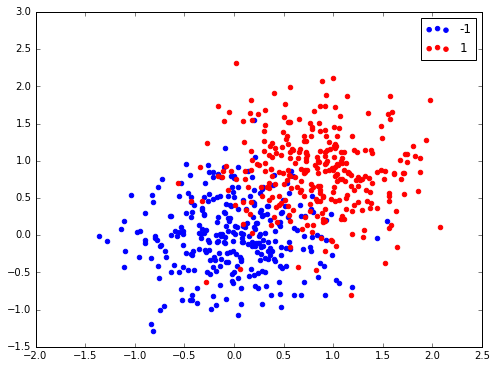

In [9]:
plot_datapoints(zeros, ones)

In [10]:
X,y = generate_dataset(zeros, ones)

In [11]:
K = polynomial_kernel_matrix(X)

In [12]:
%load_ext autoreload
%autoreload 2

In [13]:
svm = SVM(loss='hinge')

In [14]:
w, b = get_weights_and_intercept(X, K, y, svm)

In [15]:
y_pred = svm.predict(K)

x1= [0.         0.59345131]  x2= [0.64251137 0.        ]  a= -0.9236432842535769  c= 0.5934513084146276


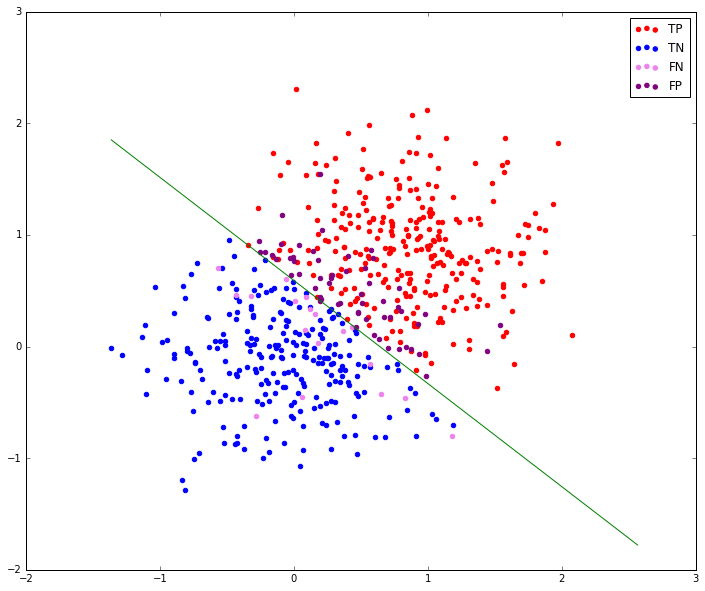

In [16]:
plot_predictions(X, y, y_pred, w, b)

In [17]:
zeros, ones = generate_points(n_samples=600, offset=0.75)

In [18]:
X_test,y_test = generate_dataset(zeros, ones)

In [19]:
X_tot = np.concatenate((X, X_test))
K_tot = polynomial_kernel_matrix(X_tot)
K_train = K_tot[:len(y), :len(y)]
K_test = K_tot[len(y):, :len(y)]

In [20]:
y_test_pred = svm.predict(K_test)

In [21]:
print('Accuracy on Training set : {:.3f}'.format(accuracy_score(y, y_pred)))
print('Accuracy on Training set : {:.3f}'.format(accuracy_score(y_test, y_test_pred)))

Accuracy on Training set : 0.875
Accuracy on Training set : 0.840


### Testing SVM in higher dimension

In [22]:
off = 0.2
zeros, ones = generate_points(n_samples=50, offset=off, dim=100)

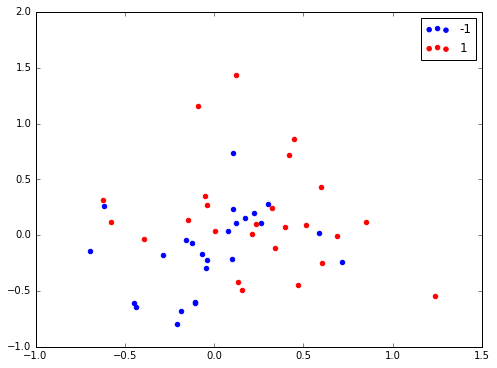

In [23]:
plot_datapoints(zeros[:,:2], ones[:,:2])

##### Train Set

In [24]:
X,y = generate_dataset(zeros, ones)

In [25]:
K = polynomial_kernel_matrix(X)

In [26]:
svm = SVM(loss='squared_hinge', lmbd=0.001)

##### Test Set

In [33]:
zeros, ones = generate_points(n_samples=1000, offset=off, dim=100)

In [34]:
X_test,y_test = generate_dataset(zeros, ones)

In [35]:
X_tot = np.concatenate((X, X_test))
K_tot = polynomial_kernel_matrix(X_tot)
K_train = K_tot[:len(y), :len(y)]
K_test = K_tot[len(y):, :len(y)]

##### Training

In [36]:
svm.train(K_train, y)

##### Predictig

In [37]:
y_test_pred = svm.predict(K_test)

In [38]:
print('Accuracy on Training set : {:.3f}'.format(accuracy_score(y, y_pred)))
print('Accuracy on Training set : {:.3f}'.format(accuracy_score(y_test, y_test_pred)))

Accuracy on Training set : 1.000
Accuracy on Training set : 0.847


# Testing on Real Data  : a dimension 50 feature embedding of genetic sequences

In [41]:
X = pd.read_csv('data/Xtr0_mat50.csv', sep=' ', header=None).values
y = pd.read_csv("data/Ytr0.csv", index_col=0).ix[:,0].values
y = 2 * (y - 0.5)

In [45]:
K = polynomial_kernel_matrix(X)
K_train, K_test, y_train, y_test = train_test_split(K, y, test_size=0.2, verbose=True)

Total number of examples : 2000
Ratio of positive samples : 0.50
Ratio of negative to positive labels in the data : 1.00


In [46]:
model = SVM()
for lmbd in [0.001, 0.01, 0.1, 0.5, 1., 1.5, 10]:
    model.lmbd = lmbd
    model.train(K_train, y_train)
    y_train_pred = model.predict(K_train)
    y_test_pred = model.predict(K_test)
    train_error = 0.5 * np.mean(np.abs(y_train_pred - y_train))
    test_error = 0.5 * np.mean(np.abs(y_test_pred - y_test))
    print('\n\t\t\t ------- lambda = {} -------'.format(lmbd))
    print('\t\t\t ####### Train score = {:.3f} #######'.format(1 - train_error))
    print('\t\t\t ####### Test score = {:.3f} #######\n'.format(1 - test_error))


			 ------- lambda = 0.001 -------
			 ####### Train score = 0.589 #######
			 ####### Test score = 0.555 #######


			 ------- lambda = 0.01 -------
			 ####### Train score = 0.589 #######
			 ####### Test score = 0.555 #######


			 ------- lambda = 0.1 -------
			 ####### Train score = 0.589 #######
			 ####### Test score = 0.555 #######


			 ------- lambda = 0.5 -------
			 ####### Train score = 0.589 #######
			 ####### Test score = 0.555 #######


			 ------- lambda = 1.0 -------
			 ####### Train score = 0.589 #######
			 ####### Test score = 0.555 #######


			 ------- lambda = 1.5 -------
			 ####### Train score = 0.589 #######
			 ####### Test score = 0.555 #######


			 ------- lambda = 10 -------
			 ####### Train score = 0.589 #######
			 ####### Test score = 0.555 #######



### Comparing our model to sklearn's baseline 

In [50]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split

In [48]:
model = LinearSVC(loss='hinge', C=0.1)

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

In [53]:
for lmbd in [0.001, 0.01, 0.1, 0.5, 1., 1.5, 10]:
    model.C = lmbd
    model.fit(X_train, y_train)
    y_train_pred1 = model.predict(X_train)
    y_test_pred1 = model.predict(X_test)
    train_error1 = 0.5 * np.mean(np.abs(y_train_pred1 - y_train))
    test_error1 = 0.5 * np.mean(np.abs(y_test_pred1 - y_test))
    print('------- lambda = {} -------'.format(model.C))
    print('####### Train score = {:.3f} #######'.format(1 - train_error1))
    print('####### Test score = {:.3f} #######\n'.format(1 - test_error1))

------- lambda = 0.001 -------
####### Train score = 0.502 #######
####### Test score = 0.493 #######

------- lambda = 0.01 -------
####### Train score = 0.502 #######
####### Test score = 0.493 #######

------- lambda = 0.1 -------
####### Train score = 0.502 #######
####### Test score = 0.493 #######

------- lambda = 0.5 -------
####### Train score = 0.502 #######
####### Test score = 0.493 #######

------- lambda = 1.0 -------
####### Train score = 0.503 #######
####### Test score = 0.498 #######

------- lambda = 1.5 -------
####### Train score = 0.544 #######
####### Test score = 0.537 #######

------- lambda = 10 -------
####### Train score = 0.627 #######
####### Test score = 0.647 #######



### Using more complex Kernels

##### 1) Polynomials of higher degree

In [62]:
X.shape

(2000, 50)

In [68]:
from tools import train_test_split

In [69]:
K = polynomial_kernel_matrix(X, deg=2)
K_train, K_test, y_train, y_test = train_test_split(K, y, test_size=0.2)

In [71]:
model = SVM()
for lmbd in [0.001, 0.01, 0.1, 0.5, 1., 1.5, 10]:
    model.lmbd = lmbd
    model.train(K_train, y_train)
    y_train_pred = model.predict(K_train)
    y_test_pred = model.predict(K_test)
    train_error = 0.5 * np.mean(np.abs(y_train_pred - y_train))
    test_error = 0.5 * np.mean(np.abs(y_test_pred - y_test))
    print('\n\t\t\t ------- lambda = {} -------'.format(lmbd))
    print('\t\t\t ####### Train score = {:.3f} #######'.format(1 - train_error))
    print('\t\t\t ####### Test score = {:.3f} #######\n'.format(1 - test_error))


			 ------- lambda = 0.001 -------
			 ####### Train score = 0.579 #######
			 ####### Test score = 0.555 #######


			 ------- lambda = 0.01 -------
			 ####### Train score = 0.579 #######
			 ####### Test score = 0.555 #######


			 ------- lambda = 0.1 -------
			 ####### Train score = 0.579 #######
			 ####### Test score = 0.555 #######


			 ------- lambda = 0.5 -------
			 ####### Train score = 0.579 #######
			 ####### Test score = 0.555 #######


			 ------- lambda = 1.0 -------
			 ####### Train score = 0.579 #######
			 ####### Test score = 0.555 #######


			 ------- lambda = 1.5 -------
			 ####### Train score = 0.579 #######
			 ####### Test score = 0.555 #######


			 ------- lambda = 10 -------
			 ####### Train score = 0.579 #######
			 ####### Test score = 0.555 #######



##### 2) Gaussian Kernel

In [73]:
K = gaussian_kernel_matrix(X, sigma=2)
K_train, K_test, y_train, y_test = train_test_split(K, y, test_size=0.2)

In [74]:
model = SVM()
for lmbd in [0.001, 0.01, 0.1, 0.5, 1., 1.5, 10]:
    model.lmbd = lmbd
    model.train(K_train, y_train)
    y_train_pred = model.predict(K_train)
    y_test_pred = model.predict(K_test)
    train_error = 0.5 * np.mean(np.abs(y_train_pred - y_train))
    test_error = 0.5 * np.mean(np.abs(y_test_pred - y_test))
    print('\n\t\t\t ------- lambda = {} -------'.format(lmbd))
    print('\t\t\t ####### Train score = {:.3f} #######'.format(1 - train_error))
    print('\t\t\t ####### Test score = {:.3f} #######\n'.format(1 - test_error))


			 ------- lambda = 0.001 -------
			 ####### Train score = 0.586 #######
			 ####### Test score = 0.603 #######


			 ------- lambda = 0.01 -------
			 ####### Train score = 0.586 #######
			 ####### Test score = 0.603 #######


			 ------- lambda = 0.1 -------
			 ####### Train score = 0.586 #######
			 ####### Test score = 0.603 #######


			 ------- lambda = 0.5 -------
			 ####### Train score = 0.586 #######
			 ####### Test score = 0.603 #######


			 ------- lambda = 1.0 -------
			 ####### Train score = 0.586 #######
			 ####### Test score = 0.603 #######


			 ------- lambda = 1.5 -------
			 ####### Train score = 0.586 #######
			 ####### Test score = 0.603 #######


			 ------- lambda = 10 -------
			 ####### Train score = 0.586 #######
			 ####### Test score = 0.603 #######



# Testing our Kernel Ridge Regression on generated sine data

In [75]:
data = generate_noisy_sine_data(norm=2)

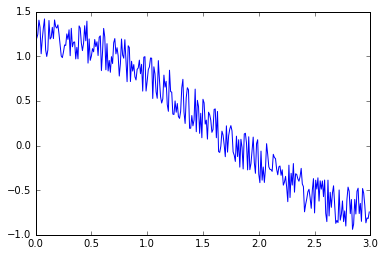

In [77]:
plot_fake_data(data)

In [78]:
X = data[:,0]
y = data[:,1]

In [79]:
K = gaussian_kernel_matrix(X.reshape(-1,1))

In [80]:
krr = KRR(lmbd=0.01)
krr.train(K,y)

In [81]:
y_pred = krr.predict(K)

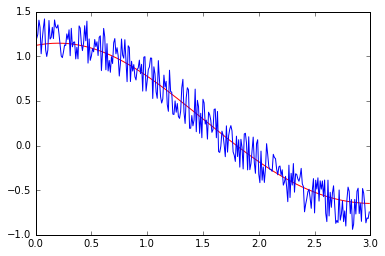

In [82]:
plt.plot(X,y_pred, color='red')
plt.plot(X, y, color="blue")
plt.show()